In [1]:
from dataviz import data_slice,data_timeplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

# Entrainement modèle prophet

In [2]:
from fbprophet import Prophet
import numpy as np



ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [3]:

X_train=pd.read_csv('training_input_qFI2jug.csv', index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
feature_list=list(X_train.columns[3:])
#X_train['timestamp']=pd.to_datetime(X_train.index)
X_train.index = pd.DatetimeIndex(X_train.index)

liste_dates = X_train.index.tolist()
for dt in liste_dates :
    X_train.at[dt, 'sort'] = dt.strftime('%m%d%H%S')

X_train['sort'].astype(int)

df_month = X_train.sort_values(by='sort', ascending=True)
df_month.head(20)
df_month = df_month.interpolate(str="linear", axis=0).ffill().bfill()
df = df_month.sort_values(by='IDS', ascending=True)

X_train.drop('sort', axis=1)

X_train['Pseudo rayonnement'] = df['Pseudo rayonnement']
X_train['timestamp']=pd.to_datetime(X_train.index)

In [4]:
X_test=pd.read_csv('testing_input_BcjTmnd.csv',index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
#X_test['timestamp']=pd.to_datetime(X_test.index)
X_test.index = pd.DatetimeIndex(X_test.index)

X_test['timestamp']=pd.to_datetime(X_test.index)

In [5]:
y_train=pd.read_csv('training_output_uamzSZW.csv',index_col="Horodate_UTC",parse_dates=['Horodate_UTC'],dayfirst=True)
#y_train['timestamp']=pd.to_datetime(y_train.index)
y_train.index = pd.DatetimeIndex(y_train.index)

y_train['timestamp']=pd.to_datetime(y_train.index)

In [6]:
y_RES1_BASE=y_train.rename(columns={'RES1_BASE':'y'})
y_RES1_BASE['ds']=y_RES1_BASE.index



In [7]:
prophet=Prophet()
prophet.fit(y_RES1_BASE.loc[:date(2017,4,30)])

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


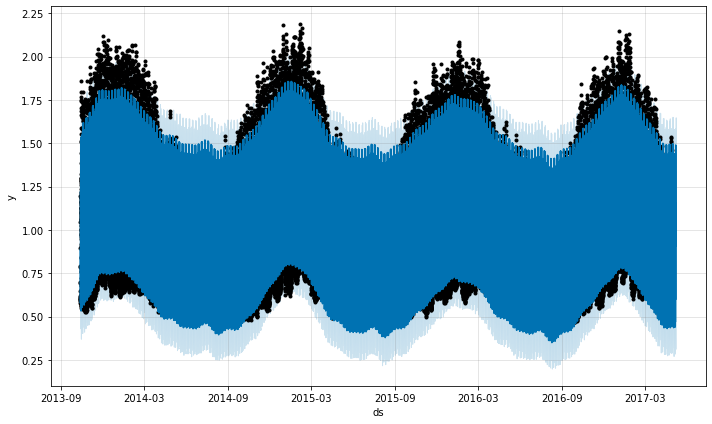

In [8]:
m=prophet
future = m.make_future_dataframe(periods=7*48, freq = '30T')
forecast = m.predict(future)
fig = m.plot(forecast)

In [9]:
forecast.shape

(62453, 22)

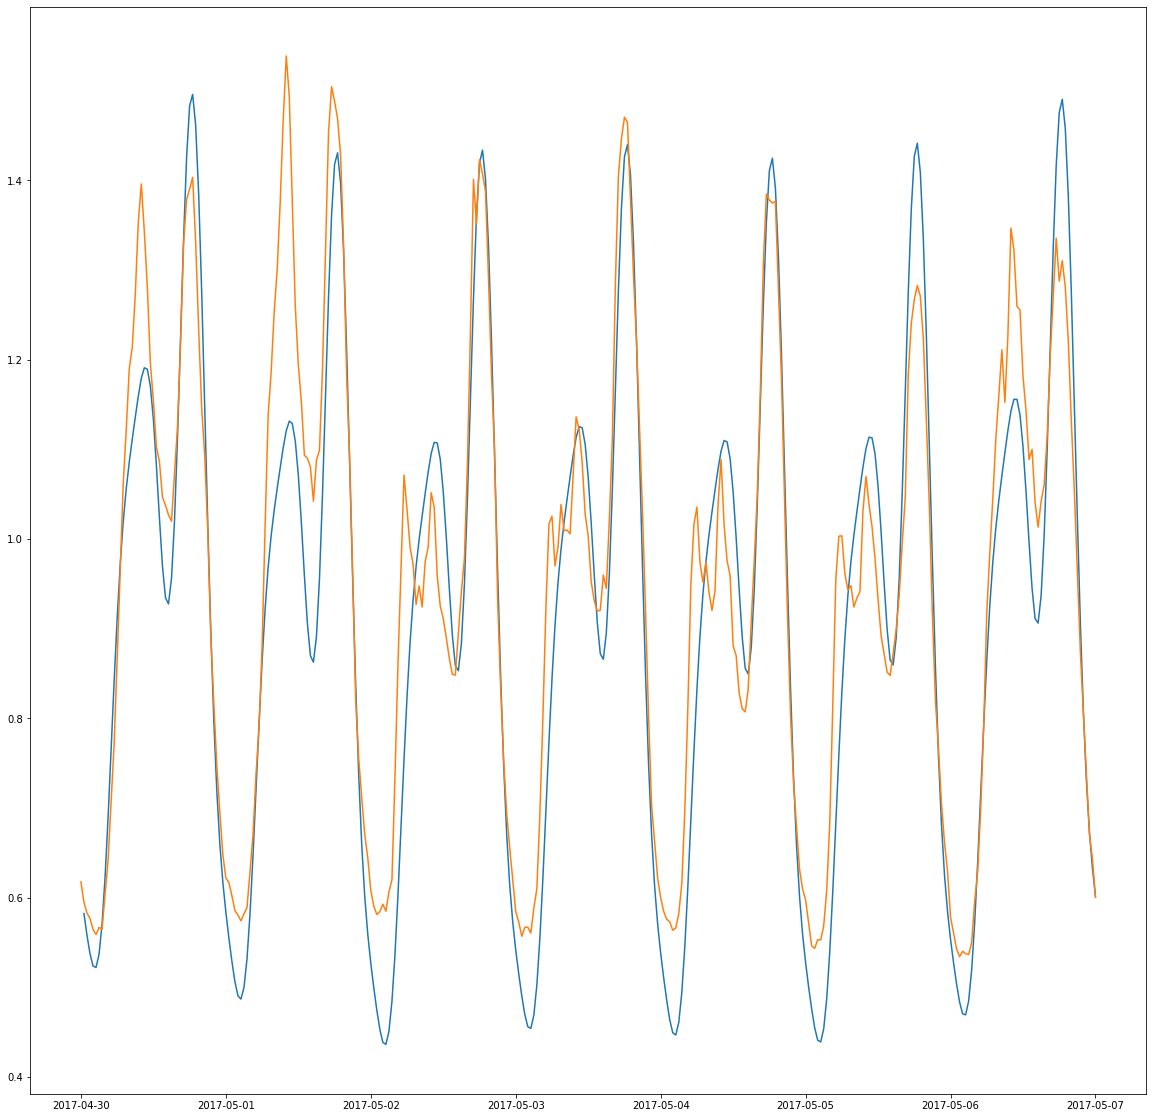

In [10]:
fig=plt.figure(figsize=(20,20))
id_max=forecast.shape[0]
plt.plot_date(forecast.iloc[id_max-7*48:id_max]['ds'],forecast.iloc[id_max-7*48:id_max]['yhat'],linestyle='-',marker=None)
plt.plot_date(y_train.loc[date(2017,4,30):date(2017,5,7)].index,y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE'],linestyle='-',marker=None)
#plt.axvline(x=date(2017,4,30),color='green')

In [11]:
from statsmodels.tools.eval_measures import rmse

In [12]:
print('RMSE',rmse(forecast.iloc[id_max-(7*48+1):id_max]['yhat'],y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE']))

print('MAPE %0.2f%%' % np.abs(100*(np.array(forecast.iloc[id_max-(7*48+1):id_max]['yhat'])-np.array(y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE']))
                    /np.array(y_train.loc[date(2017,4,30):date(2017,5,7)]['RES1_BASE'])).mean())

RMSE 0.10888310755309405
MAPE 9.03%


In [13]:
# from jours import holydays
# calendar=holydays()
# 
# df=y_RES1_BASE.loc[:date(2017,4,30)]
# 
# calendar.Dataframe(df)
# df=calendar.prophet_days_onoff()

from jours import generate_prophet_dataframe

df=generate_prophet_dataframe(y_RES1_BASE.loc[:date(2017,4,30)])


In [14]:
df.tail()

,IDS,Horodate,Mois,y,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP,timestamp,ds,winter,summer,on_work,off_work
Horodate_UTC,,,,,,,,,,,,,,,,
2017-04-29 22:00:00,62113,2017-04-29T00:00:00+02:00,4,0.814663,0.840376,0.684982,2.972425,0.341289,2.371354,0.284084,2017-04-29 22:00:00,2017-04-29 22:00:00,False,True,False,True
2017-04-29 22:30:00,62114,2017-04-29T00:30:00+02:00,4,0.752960,0.766005,0.672847,2.536995,0.337800,2.269945,0.275379,2017-04-29 22:30:00,2017-04-29 22:30:00,False,True,False,True
2017-04-29 23:00:00,62115,2017-04-29T01:00:00+02:00,4,0.697842,0.743610,0.662718,2.571302,0.242539,2.375219,0.200730,2017-04-29 23:00:00,2017-04-29 23:00:00,False,True,False,True
2017-04-29 23:30:00,62116,2017-04-29T01:30:00+02:00,4,0.647291,0.727882,0.664021,2.689254,0.168847,2.586478,0.132686,2017-04-29 23:30:00,2017-04-29 23:30:00,False,True,False,True
2017-04-30 00:00:00,62117,2017-04-29T02:00:00+02:00,4,0.617449,0.698508,0.657001,2.764839,0.059525,2.711891,0.051934,2017-04-30 00:00:00,2017-04-30 00:00:00,False,True,False,True


In [15]:
# df=df.drop(['workday'],axis=1)
df['temp'] = X_train.iloc[0:,18:19]

df.head()

,IDS,Horodate,Mois,y,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP,timestamp,ds,winter,summer,on_work,off_work,temp
Horodate_UTC,,,,,,,,,,,,,,,,,
2013-10-13 22:00:00,1,2013-10-13T00:00:00+02:00,10,0.791405,0.698925,NaN,2.780413,0.346364,NaN,NaN,2013-10-13 22:00:00,2013-10-13 22:00:00,False,True,False,True,9.6
2013-10-13 22:30:00,2,2013-10-13T00:30:00+02:00,10,0.693700,0.722778,NaN,2.301527,0.375439,NaN,NaN,2013-10-13 22:30:00,2013-10-13 22:30:00,False,True,False,True,9.6
2013-10-13 23:00:00,3,2013-10-13T01:00:00+02:00,10,0.648565,0.678717,NaN,2.361320,0.268125,NaN,NaN,2013-10-13 23:00:00,2013-10-13 23:00:00,False,True,False,True,9.6
2013-10-13 23:30:00,4,2013-10-13T01:30:00+02:00,10,0.621059,0.668509,NaN,2.567490,0.192953,NaN,NaN,2013-10-13 23:30:00,2013-10-13 23:30:00,False,True,False,True,9.5
2013-10-14 00:00:00,5,2013-10-13T02:00:00+02:00,10,0.612245,0.700487,NaN,2.563460,0.075701,NaN,NaN,2013-10-14 00:00:00,2013-10-14 00:00:00,False,True,True,False,9.5


In [16]:
def weather_temp(df):
    columns = list(X_train.columns.values.tolist()) 
    if isinstance(df.index, pd.DatetimeIndex):
        list_date = df.index.tolist()
        count = 0
        for d in list_date:
            df.at[d, 'temp'] = X_train.loc[d,columns[18]]
            count = count + 1
    return df

In [23]:
m = Prophet(daily_seasonality=False)
m.add_seasonality(name='daily_on_work', period=1, fourier_order=12, condition_name='on_work')
m.add_seasonality(name='daily_off_work', period=1, fourier_order=12, condition_name='off_work')
m.add_seasonality(name='daily_winter', period=1, fourier_order=12, condition_name='winter')
m.add_seasonality(name='daily_summer', period=1, fourier_order=12, condition_name='summer')
m.add_regressor(name='temp')
m.fit(df)

future = m.make_future_dataframe(periods=7*48, freq = '30T')


In [24]:

future['id']=future.index
future.index=future['ds']

future=generate_prophet_dataframe(future)

future = weather_temp(future)
future.head()

# calendar.Dataframe(future)
# future=calendar.prophet_days_onoff()
future.index=future['id']
future=future.drop(["id"],axis=1)
future.head()

,ds,winter,summer,on_work,off_work,temp
id,,,,,,
0,2013-10-13 22:00:00,False,True,False,True,9.6
1,2013-10-13 22:30:00,False,True,False,True,9.6
2,2013-10-13 23:00:00,False,True,False,True,9.6
3,2013-10-13 23:30:00,False,True,False,True,9.5
4,2013-10-14 00:00:00,False,True,True,False,9.5


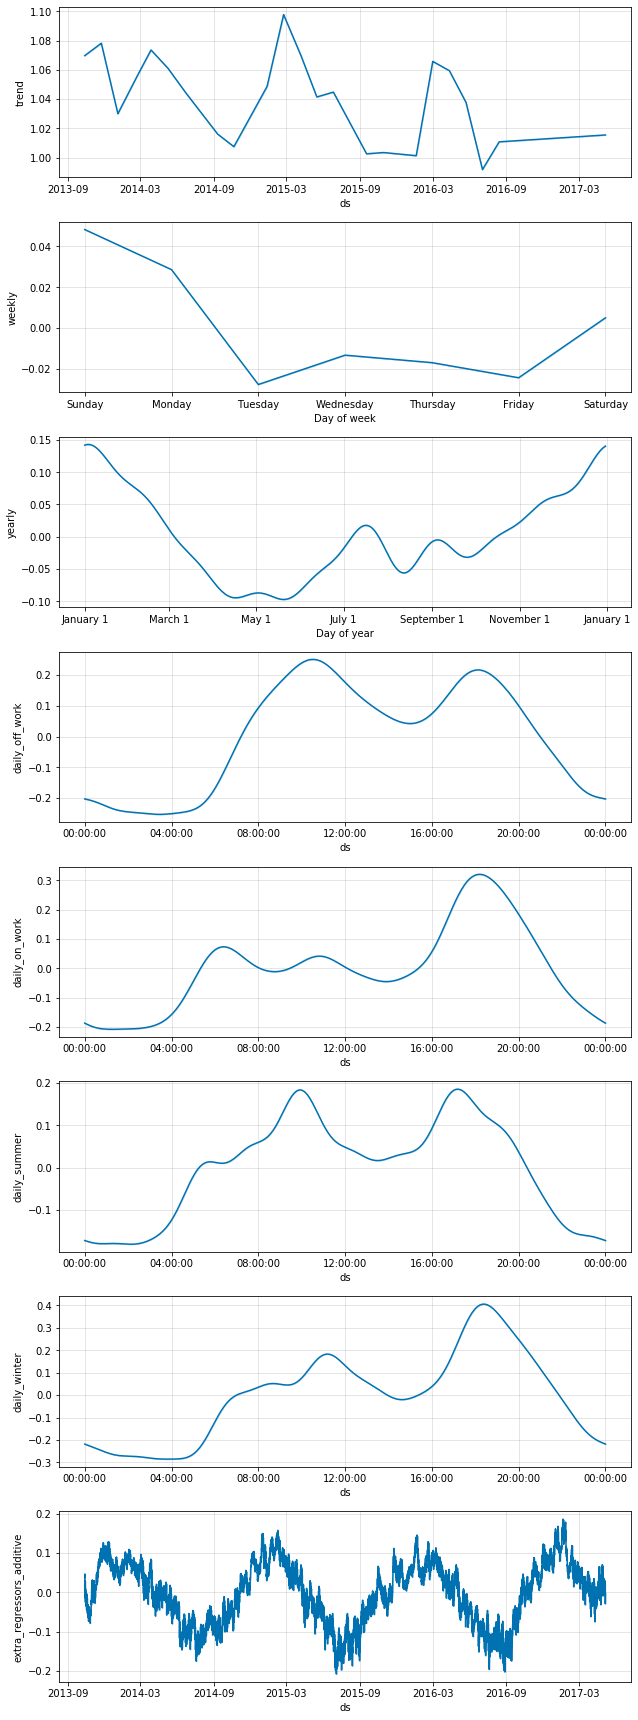

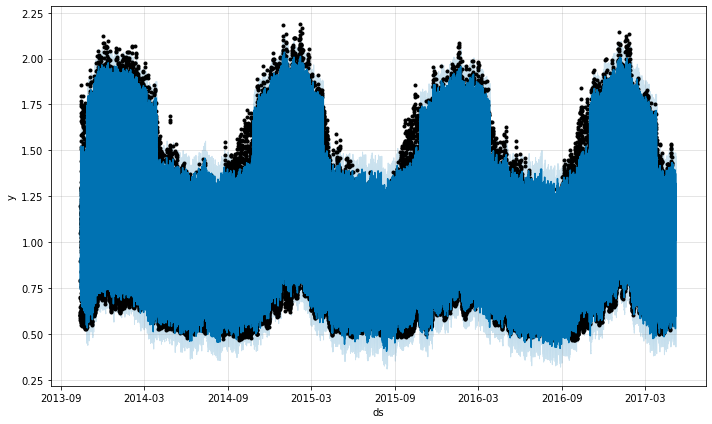

In [25]:

forecast = m.predict(future)

fig = m.plot_components(forecast)

fig = m.plot(forecast)